In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MEArec as mr


In [2]:
mr.get_default_cell_models_folder()

'/home/annareisz/.config/mearec/1.9.1/cell_models/bbp'

In [42]:

cell_models_folder = "/home/annareisz/.config/mearec/1.9.1/cell_models/bbp"
tempgen = mr.gen_templates(cell_models_folder, params=None, templates_tmp_folder=None, intraonly=False, parallel=True,
                           recompile=False, n_jobs=None, delete_tmp=True, verbose=False)

/home/annareisz/miniconda3/envs/mlsp/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/home/annareisz/.config/mearec/1.9.1/cell_models/bbp/mods
Mod files: "./CaDynamics_E2.mod" "./Ca_HVA.mod" "./Ca_LVAst.mod" "./Ca.mod" "./Ih.mod" "./Im.mod" "./K_Pst.mod" "./K_Tst.mod" "./Nap_Et2.mod" "./NaTa_t.mod" "./NaTs2_t.mod" "./ProbAMPANMDA_EMS.mod" "./ProbGABAAB_EMS.mod" "./SK_E2.mod" "./SKv3_1.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../CaDynamics_E2.mod
 -> NMODL ../Ca_HVA.mod
 -> NMODL ../Ca_LVAst.mod
 -> NMODL ../Ca.mod
 -> NMODL ../Ih.mod
 -> NMODL ../Im.mod
 -> NMODL ../K_Pst.mod
 -> NMODL ../K_Tst.mod
 -> NMODL ../Nap_Et2.mod
 -> NMODL ../NaTa_t.mod
 -> NMODL ../NaTs2_t.mod
 -> NMODL ../ProbAMPANMDA_EMS.mod
 -> NMODL ../ProbGABAAB_EMS.mod
 -> NMODL ../SK_E2.mod
 -> NMODL ../SKv3_1.mod
 -> Compiling CaDynamics_E2.c
 -> Compiling Ca_HVA.c
 -> Compiling Ca_LVAst.c


Translating CaDynamics_E2.mod into /home/annareisz/.config/mearec/1.9.1/cell_models/bbp/mods/x86_64/CaDynamics_E2.c
Translating Ca_HVA.mod into /home/annareisz/.config/mearec/1.9.1/cell_models/bbp/mods/x86_64/Ca_HVA.c
Thread Safe
Thread Safe
Translating Ca_LVAst.mod into /home/annareisz/.config/mearec/1.9.1/cell_models/bbp/mods/x86_64/Ca_LVAst.c
Translating Ca.mod into /home/annareisz/.config/mearec/1.9.1/cell_models/bbp/mods/x86_64/Ca.c
Thread Safe
Translating Ih.mod into /home/annareisz/.config/mearec/1.9.1/cell_models/bbp/mods/x86_64/Ih.c
Thread Safe
Thread Safe
Translating Im.mod into /home/annareisz/.config/mearec/1.9.1/cell_models/bbp/mods/x86_64/Im.c
Translating K_Pst.mod into /home/annareisz/.config/mearec/1.9.1/cell_models/bbp/mods/x86_64/K_Pst.c
Thread Safe
Thread Safe
Translating K_Tst.mod into /home/annareisz/.config/mearec/1.9.1/cell_models/bbp/mods/x86_64/K_Tst.c
Thread Safe
Translating NaTa_t.mod into /home/annareisz/.config/mearec/1.9.1/cell_models/bbp/mods/x86_64/NaTa_

 -> Compiling Ca.c
 -> Compiling Ih.c
 -> Compiling Im.c
 -> Compiling K_Pst.c
 -> Compiling K_Tst.c
 -> Compiling Nap_Et2.c
 -> Compiling NaTa_t.c
 -> Compiling NaTs2_t.c
 -> Compiling ProbAMPANMDA_EMS.c
 -> Compiling ProbGABAAB_EMS.c
 -> Compiling SK_E2.c
 -> Compiling SKv3_1.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
cell_models_folder is different!
Setting n_jobs to 8 CPUs
Starting simulation 7/13 - cell: L5_NBC_bAC217_1

Starting simulation 8/13 - cell: L5_NGC_bNAC219_1

Starting simulation 3/13 - cell: L5_ChC_cACint209_1

Starting simulation 5/13 - cell: L5_LBC_bAC217_1

Starting simulation 1/13 - cell: L5_BP_bAC217_1

Starting simulation 2/13 - cell: L5_BTC_bAC217_1

Starting simulation 4/13 - cell: L5_DBC_bAC217_1

Starting simulation 6/13 - cell: L5_MC_bAC217_1

Intracellular simulation: /home/annareisz/.config/mearec/1.9.1/cell_models/bbp/L5_NGC_bNAC219_1
Intracellular simulation: 

In [56]:
tempgen.locations[400, :]

array([17.40153159, -0.89352644, -0.579501  ])

<Axes: >

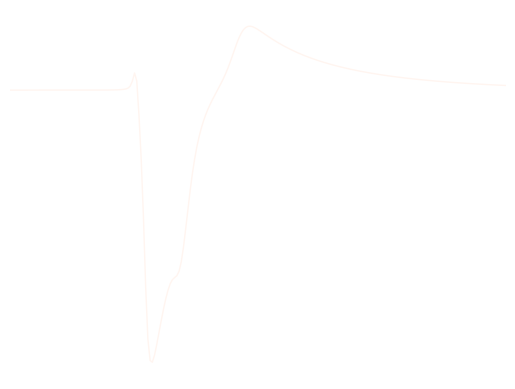

In [64]:
mr.plot_templates(tempgen, template_ids=400, drifting=True, cmap='Reds')